In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !git clone https://github.com/pjl1995/CTracker # rename this folder as CTRACKER_ROOT through gdrive or the side panel

In [ ]:
# download the dataset 
# !wget https://motchallenge.net/data/MOT17Det.zip -p /content/drive/MyDrive/CTRACKER_ROOT/

In [ ]:
# !unzip /content/drive/MyDrive/CTRACKER_ROOT/motchallenge.net/data/MOT17Det.zip -d /content/drive/MyDrive/CTRACKER_ROOT/MOT17_ROOT/

In [ ]:
# change directory
%cd /content/drive/MyDrive/CTRACKER_ROOT

/content/drive/MyDrive/CTRACKER_ROOT


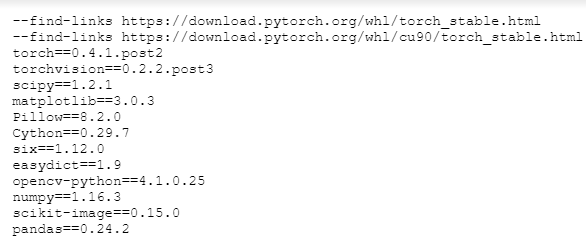

In [ ]:
# modify the req.txt file as shown above
%pip install -r requirements.txt

Looking in links: https://download.pytorch.org/whl/torch_stable.html, https://download.pytorch.org/whl/cu90/torch_stable.html
     |████████████████████████████████| 519.5 MB 24 kB/s 
     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 24.8 MB 1.5 MB/s 
     |████████████████████████████████| 13.0 MB 15.5 MB/s 
     |████████████████████████████████| 3.0 MB 38.0 MB/s 
     |████████████████████████████████| 2.1 MB 40.0 MB/s 
     |████████████████████████████████| 26.6 MB 1.5 MB/s 
     |████████████████████████████████| 17.3 MB 161 kB/s 
     |████████████████████████████████| 26.3 MB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 32.1 MB/s 
     |████████████████████████████████| 6.1 MB 33.9 MB/s 
     |████████████████████████████████| 4.4 MB 31.4 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: Pillow
    

In [ ]:
# !apt-get install tk-dev python-tk

ERROR: Could not find a version that satisfies the requirement python-tk (from versions: none)
ERROR: No matching distribution found for python-tk


In [ ]:
import torch
torch.__version__

'0.4.1.post2'

In [ ]:
!nvidia-smi

Tue Mar 29 15:41:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# training
!CUDA_VISIBLE_DEVICES=0 python train.py --root_path MOT17_ROOT --model_dir ./ctracker/ --depth 50 --epochs 5

CUDA available: True
CUDA available: True
Namespace(csv_classes='train_labels.csv', csv_train='train_annots.csv', dataset='csv', depth=50, epochs=5, model_dir='./ctracker/', root_path='MOT17_ROOT')
./ctracker/
total vedio count: 7
Num training images: 5316
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
Epoch: 0 | Iter: 0 | Cls loss: 1.13049 | Reid loss: 0.84937 | Reg loss: 1.72758 | Running loss: 3.70744
Epoch: 0 | Iter: 1 | Cls loss: 0.98990 | Reid loss: 0.99864 | Reg loss: 1.26015 | Running loss: 3.47806
Epoch: 0 | Iter: 2 | Cls loss: 0.67663 | Reid loss: 0.69304 | Reg loss: 1.51562 | Running loss: 3.28047
Epoch: 0 | Iter: 3 | Cls loss: 4.72892 | Reid loss: 5.94727 | Reg loss: 1.04087 | Running loss: 5.38962
Epoch: 0 | Iter: 4 | Cls loss: 13.14541 | Reid loss: 11.49225 | Reg loss: 1.03348 | 

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename